In [94]:
# Importando o pandas e dataset de treino e teste
import pandas as pd
treino=pd.read_csv('train.csv')
teste=pd.read_csv('test.csv')

In [95]:
# Visualizando essa base
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [96]:
# Retornando o shape da base para ter uma noção de quantas linhas e colunas tem a base.
treino.shape

(1460, 81)

In [97]:
# Verificando as informações da base.
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Explorando os dados

In [98]:
# Visualizando % de valores vazios por coluna
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

In [99]:
# Eliminando as colunas com mais de 10% de valores vazios
eliminar=treino.columns[treino.isnull().sum()/treino.shape[0]>0.1]
treino = treino.drop(eliminar,axis=1)

- Tratando valores vazios como '-1', para deixar claro que o processo da transição de dados veio de forma correta,
mas o dado veio inexistente. Como não existe valores negativos nativos da base, essa transformação não será um problema.

In [100]:
# Retirando os valores vazios
treino=treino.fillna(-1)

- Para inserir nos modelos de Machine Learn é necessário que os dados sejam numericos. Optei por deixar de lado as colunas não numéricas.

In [101]:
# Agora deixando a base apenas com as colunas numéricas
col_numericas=treino.columns[treino.dtypes!='object']
treino=treino.loc[:,col_numericas]
treino.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500


- Apenas com os tratamentos acima, conseguimos diminuir de 81 para 37 colunas. tratando colunas com muitas linhas vazias e não numéricas.

## Utilizando técnicas de Machine Learn

- **Separando em treino e teste**

In [102]:
# Selecionando X e y
X= treino.drop(['SalePrice'],axis=1)
y=treino.SalePrice

In [103]:
# Importando o train_test_split e separando essa base em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Começando com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [104]:
# Importando a regressão linear, árvore de regressão, KNN
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [105]:
# Criando o regressor e fazendo o fit com os dados de treino Regressão
reg_linear = LinearRegression().fit(X_train, y_train)
# Criando o regressor e fazendo o fit com os dados de treino  árvore de regressão
clf_tree = tree.DecisionTreeRegressor().fit(X_train, y_train)
# Criando o regressor e fazendo o fit com os dados de treino KNN
neigh_KNN = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [106]:
# Fazendo a previsão pros dados de teste Regressão
reg_pred=reg_linear.predict(X_test)
# Fazendo a previsão pros dados de teste árvore de regressão
clf_pred=clf_tree.predict(X_test)
# Fazendo a previsão de teste árvore de regressão KNN
neigh_pred=neigh_KNN.predict(X_test)

In [107]:
# Importando o erro médio absoluto e o erro quadrático médio
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [108]:
# Avaliando o erro da regressão
print(f'O erro absoluto da Regressão é de {mean_absolute_error(y_test, reg_pred):.2f}')
print(f'O erro quadratico da Regressão é de {mean_squared_error(y_test, reg_pred):.2f}')
print('----------------------')
# da árvore de decisão
print(f'O erro absoluto da Árvore é de {mean_absolute_error(y_test, clf_pred):.2f}')
print(f'O erro quadratico da Árvore é de {mean_squared_error(y_test, clf_pred):.2f}')
print('----------------------')
# e do knn
print(f'O erro absoluto do KNN é de {mean_absolute_error(y_test, neigh_pred):.2f}')
print(f'O erro quadratico do KNN é de {mean_squared_error(y_test, neigh_pred):.2f}')

O erro absoluto da Regressão é de 23763.19
O erro quadratico da Regressão é de 1533982883.44
----------------------
O erro absoluto da Árvore é de 28485.90
O erro quadratico da Árvore é de 2782343529.60
----------------------
O erro absoluto do KNN é de 33273.08
O erro quadratico do KNN é de 2733937586.84


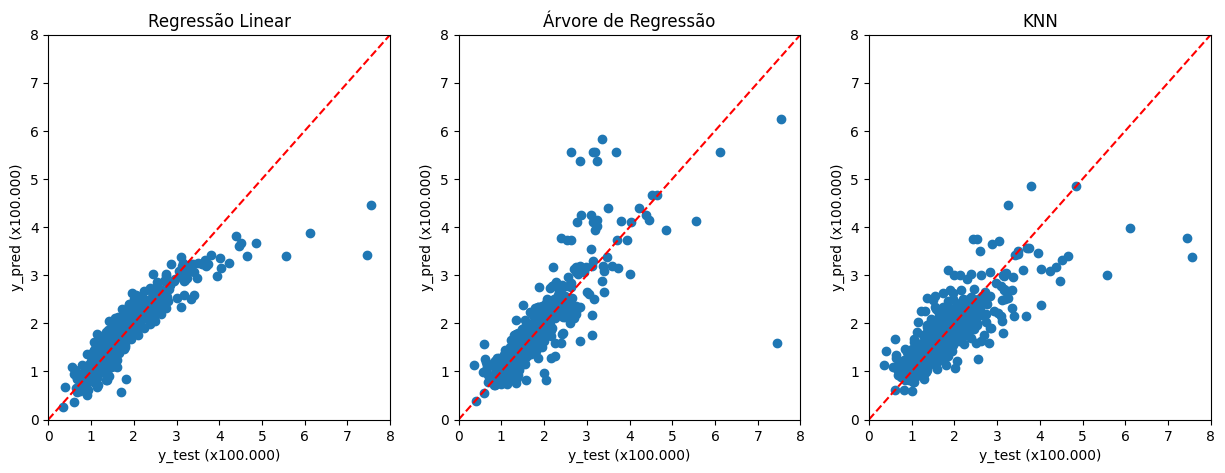

In [112]:
#Visualizando graficamente.
import matplotlib.pyplot as plt
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, reg_pred/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, clf_pred/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, neigh_pred/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

- **Vou utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Prevendo para a base de teste da competição

In [109]:
# Visualizando a base
teste.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


- **Agora irei repetir os mesmos tratamentos que fizemos na base de treino**

In [110]:
# Eliminando as mesmas colunas e fazendo os mesmos tratamentos da base de treino
(teste.isnull().sum()/teste.shape[0]).sort_values(ascending=False).head(10)
eliminar2=teste.columns[teste.isnull().sum()/teste.shape[0]>0.1]
teste = teste.drop(eliminar2,axis=1)
teste=teste.fillna(-1)
col_numericas2=teste.columns[teste.dtypes!='object']
teste=teste.loc[:,col_numericas2]
teste.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010


- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [111]:
# Vamos usar a Regressão Linear para fazer a previsão e adiciona-la na base de teste.
y_pred=reg_linear.predict(teste)
teste['SalePrice'] = y_pred

In [92]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(2)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684


In [60]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado1.csv',index=False)